In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("/content/diabetes.csv")

print("Initial shape:", df.shape)
print(df.head())


invalid_zero_cols = [
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI'
]

# Replace 0 with NaN
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)

print("\nMissing values after replacing invalid zeros:")
print(df.isna().sum())


# 4. Impute missing values using MEDIAN

for col in invalid_zero_cols:
    df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after imputation:")
print(df.isna().sum())

# 5. Handle outliers in Pregnancies (NOT zeros)

Q1 = df['Pregnancies'].quantile(0.25)
Q3 = df['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("\nPregnancies IQR limits:")
print("Lower bound:", lower)
print("Upper bound:", upper)

# Cap extreme pregnancy values
df['Pregnancies'] = df['Pregnancies'].clip(lower=0, upper=upper)

# 6. Outlier capping for medical features

for col in invalid_zero_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.clip(df[col], lower, upper)


print("\nFinal dataset check:")
print(df.describe())
print("\nAny missing values left?")
print(df.isna().sum())

df.to_csv("/content/cleaned_diabetes.csv", index=False)
print("\nCleaned dataset saved as cleaned_diabetes.csv")


Initial shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values after replacing invalid zeros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age     

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age     Outcome
count   768.000000  768.000000     768.000000     768.000000  768.000000  768.000000                768.000000  768.000000  768.000000
mean      3.837240  121.656250      72.358073      28.866536  124.691081   32.393359                  0.471876   33.240885    0.348958
std       3.344157   30.438286      11.697097       7.442353    7.913595    6.667471                  0.331329   11.760232    0.476951
min       0.000000   44.000000      40.000000      14.500000  112.875000   18.200000                  0.078000   21.000000    0.000000
25%       1.000000   99.750000      64.000000      25.000000  121.500000   27.500000                  0.243750   24.000000    0.000000
50%       3.000000  117.000000      72.000000      29.000000  125.000000   32.300000                  0.372500   29.000000    0.000000
75%       6.000000  140.250000      80.000000      32.0

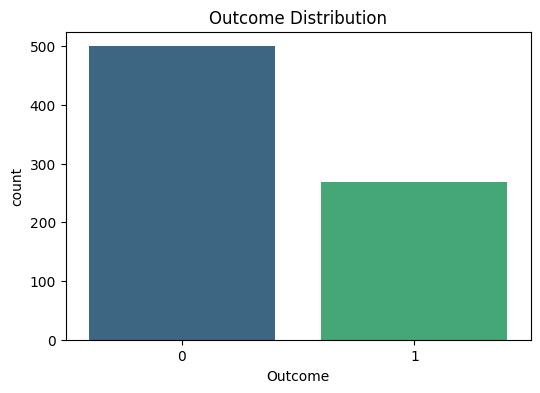


Mean Values by Outcome:
          Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin        BMI  DiabetesPedigreeFunction        Age
Outcome                                                                                                                   
0           3.298000  110.682000       70.91200      27.668000  123.148750  30.867400                  0.429734  31.190000
1           4.843284  142.130597       75.05597      31.102612  127.568563  35.240299                  0.550500  37.067164


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the cleaned dataset
data = pd.read_csv("/content/cleaned_diabetes.csv")

# Summary Statistics
print(data.describe().to_string())

# Outcome Distribution
outcome_counts = data['Outcome'].value_counts()
print("\nOutcome Distribution:\n", outcome_counts.to_string())

# Plot Outcome Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Outcome', hue='Outcome', palette='viridis', legend=False)
plt.title("Outcome Distribution")
plt.show()

# Compare Mean Values of Features by Outcome
mean_values = data.groupby('Outcome').mean()
print("\nMean Values by Outcome:\n", mean_values.to_string())

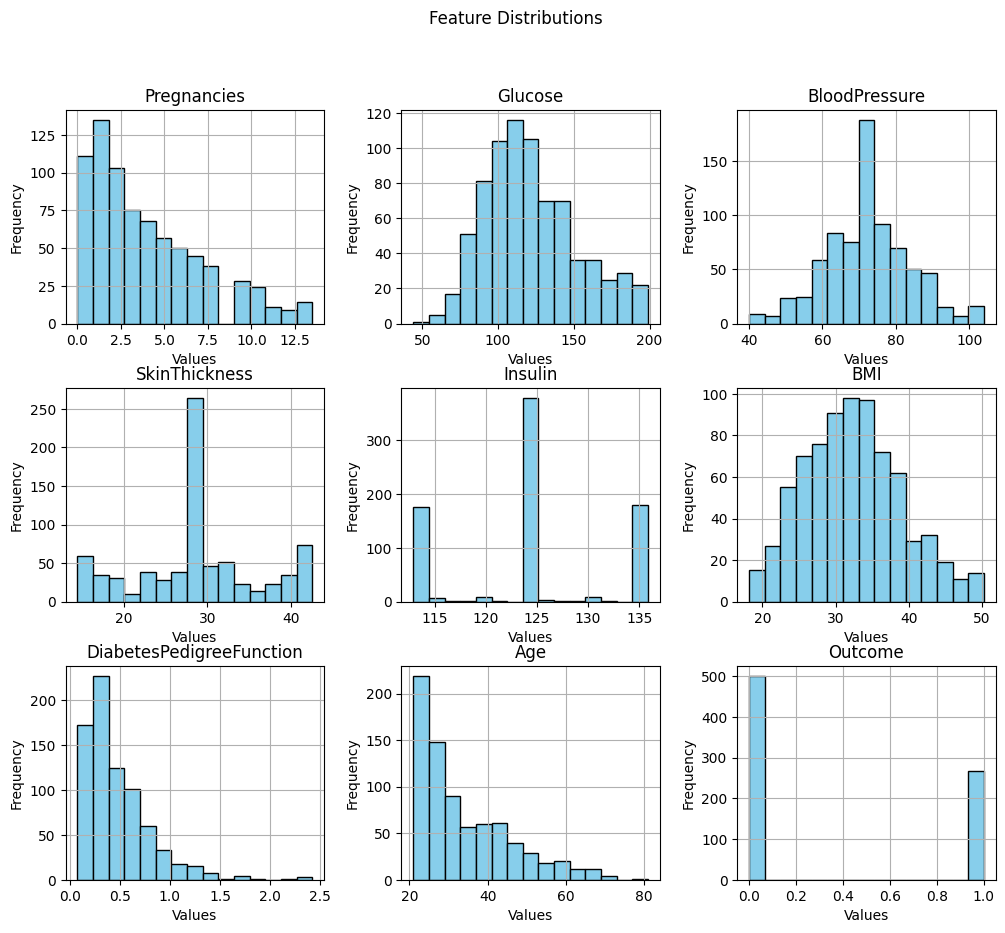

In [4]:
# Histograms for Feature Distribution
axes =data.hist(figsize=(12, 10), bins=15, color='skyblue', edgecolor='black')
# Set titles and axis labels
for ax in axes.flatten():
    ax.set_xlabel("Values", fontsize=10)  # Label for x-axis
    ax.set_ylabel("Frequency", fontsize=10)  # Label for y-axis
    ax.set_title(ax.get_title(), fontsize=12)  # Keep the original title and adjust font size
plt.suptitle("Feature Distributions")
plt.show()

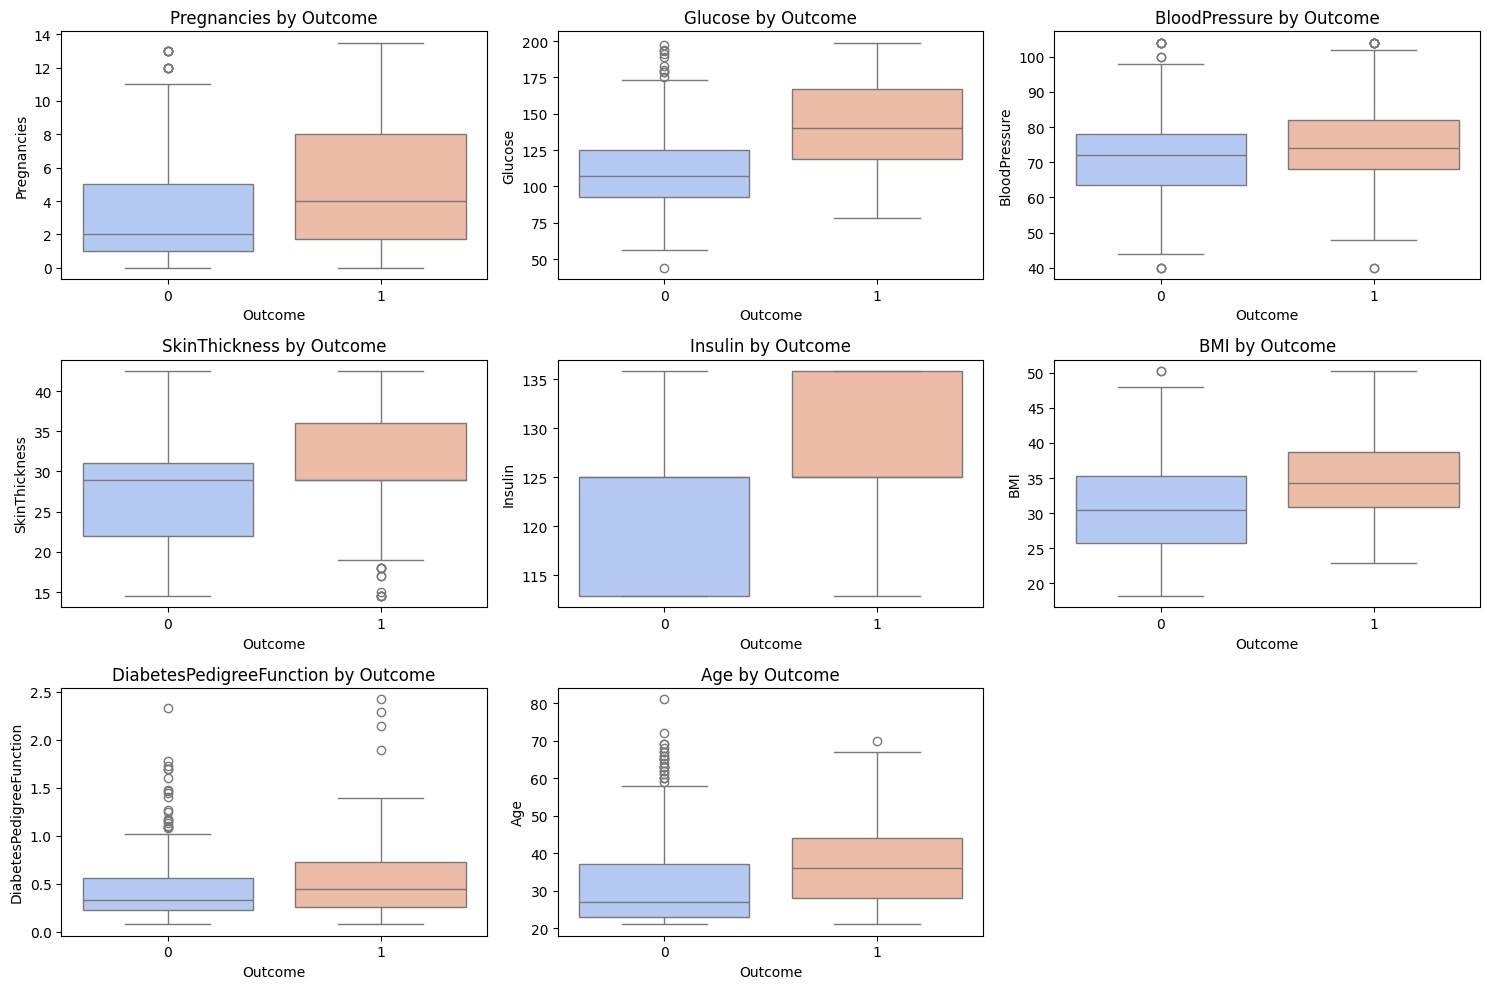

In [3]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# Boxplots to Visualize Outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):  # Exclude 'Outcome'
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, x='Outcome', y=column, palette='coolwarm')
    plt.title(f"{column} by Outcome")
plt.tight_layout()
plt.show()


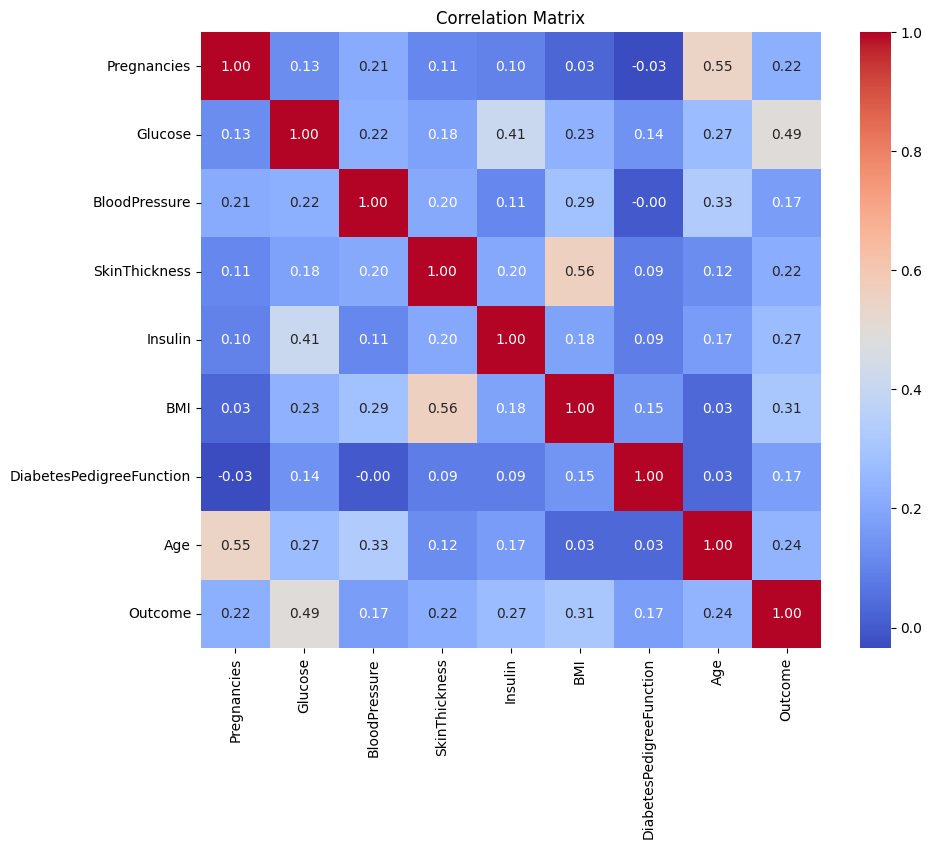

In [4]:
# Correlation Matrix

plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [7]:
#Training and Testing model with help of Machine Learning

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


data = pd.read_csv("/content/cleaned_diabetes.csv")

# Split data into features (X) and target (y)
X = data.drop("Outcome", axis=1)  # Features
y = data["Outcome"]              # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Function to make predictions
def predict_diabetes():
    print("\nEnter the following details to predict diabetes:")
    pregnancies = int(input("Pregnancies: "))
    glucose = float(input("Glucose: "))
    blood_pressure = float(input("Blood Pressure: "))
    skin_thickness = float(input("Skin Thickness: "))
    insulin = float(input("Insulin: "))
    bmi = float(input("BMI: "))
    diabetes_pedigree_function = float(input("Diabetes Pedigree Function: "))
    age = int(input("Age: "))

    # Prepare input data as a 2D array
    input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness,
                            insulin, bmi, diabetes_pedigree_function, age]])

    # Make a prediction
    prediction = model.predict(input_data)[0]
    if prediction == 1:
        print("\nThe model predicts: Diabetes (Outcome = 1)")
    else:
        print("\nThe model predicts: No Diabetes (Outcome = 0)")

# Call the prediction function
predict_diabetes()


Model Accuracy: 0.7792207792207793

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        99
           1       0.68      0.71      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154


Enter the following details to predict diabetes:
Pregnancies: 2
Glucose: 86
Blood Pressure: 85
Skin Thickness: 25
Insulin: 130
BMI: 25
Diabetes Pedigree Function: 0.43
Age: 43

The model predicts: No Diabetes (Outcome = 0)
